In [675]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mlrose_hiive as mlrose_new
from numpy import asarray
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from mlrose_hiive import SARunner, GARunner, NNGSRunner

## Traveling salesman problem 
**in this problem we found GA to be the best fitting algorithm**

Created my own traveling salesman data with coordinates of major cities  around the world


In [676]:
df = pd.read_csv('./Data/concap.csv', header=None)
df = df.loc[1:,:]
df.head()

,0,1,2,3,4,5
1,Somaliland,Hargeisa,9.55,44.050000,NaN,Africa
2,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
3,French Southern and Antarctic Lands,Port-aux-Français,-49.35,70.216667,TF,Antarctica
4,Palestine,Jerusalem,31.766666666666666,35.233333,PS,Asia
5,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [677]:
df[2]= df[2].astype('float').astype('int')
df[3]= df[3].astype('float').astype('int')
df = df[(df[2]>0) & (df[3] >0)]
df= df.sample(20, random_state =10)

In [678]:
records = df.loc[:,2:3].to_records(index=False)
result = list(records)
print(result)

[(48, 17), (50, 30), (42, 74), (39, 32), (23, 58), (46, 14), (17, 102), (36, 10), (41, 12), (60, 19), (37, 23), (28, 77), (60, 24), (41, 12), (41, 44), (31, 35), (26, 50), (37, 126), (35, 14), (35, 33)]


In [679]:
## copy coordinates
result = [(48, 17), (50, 30), (42, 74), (39, 32), (23, 58), (46, 14), (17, 102), (36, 10), (41, 12), (60, 19), (37, 23), (28, 77), (60, 24), (41, 12), (41, 44), (31, 35), (26, 50), (37, 126), (35, 14), (35, 33)]
# Initialize fitness function object using coords_list
fitness_coords = mlrose_new.TravellingSales(coords = result)
# Define optimization problem object
problem_fit = mlrose_new.TSPOpt(length = 20, fitness_fn = fitness_coords, maximize=False)

In [680]:
best_state, best_fitness = mlrose_new.genetic_alg(problem_fit, random_state = 2)[:-1]
best_fitness

301.51739800877135

In [681]:
mlrose_new.random_hill_climb(problem_fit, max_attempts=100, max_iters= 100, restarts=10, random_state = 2)
    

(array([16,  4,  2, 17,  6, 11, 14, 19,  3,  5, 10,  0, 12,  9,  1,  8, 18,
        13,  7, 15]), 354.09366458752726, None)

In [682]:
mlrose_new.random_hill_climb(problem_fit, max_attempts=100, max_iters= max_iters, restarts=10, random_state = 2)[1]


665.4947954416893

In [663]:
## random_hill_climb
def random_hill_climb(problem_fit, max_attempt = 30, max_iters = 100):
    start_time = time.time()
    fitness_score = mlrose_new.random_hill_climb(problem_fit, max_attempts=30, max_iters= max_iters, restarts=10, random_state = 2)[1]
    
    end_time = time.time()
    duration = end_time - start_time 
    return fitness_score, duration, max_iters, 'random_hill_climb'



In [664]:
## simulated_annealing
def simulated_annealing(problem_fit, max_attempt = 30, pop_size = 200, max_iters = 100):
    start_time = time.time()
    fitness_score = mlrose_new.simulated_annealing(problem_fit,
                                                      max_attempts = 30, max_iters = max_iters,
                                                      init_state = None, random_state = 2)[1]
    end_time = time.time()
    duration = end_time - start_time 
    return fitness_score, duration, max_iters, 'simulated_annealing'

In [665]:
## genetic_algorithm
def genetic_algorithm(problem_fit, max_attempt = 30, pop_size=200, max_iters = 100):
        start_time = time.time()
        fitness_score = mlrose_new.genetic_alg(problem_fit, pop_size=200, mutation_prob=0.1, max_attempts=30, max_iters = max_iters, curve=False, random_state=2)[1]
        end_time = time.time()
        duration = end_time - start_time 
        return fitness_score, duration, max_iters, 'genetic_algorithm'
    

In [666]:
## MIMIC 
def mimic(problem_fit, pop_size = 200, max_iters = 100):
    start_time = time.time()
    fitness_score = mlrose.mimic(problem_fit, pop_size=200, keep_pct=0.2, max_attempts=30, max_iters=max_iters, curve=False, random_state=2, fast_mimic=False)[1]
    end_time = time.time()
    duration = end_time - start_time 
    return fitness_score, duration, max_iters, 'mimic'


In [667]:
res = []
models = [random_hill_climb, simulated_annealing, genetic_algorithm, mimic]
for model in models: 
    for j in range(0, 2000, 100):
        res.append(model(problem_fit, max_iters = j))

In [668]:
df = pd.DataFrame(res, columns = ['fitness_score', 'duration', 'max_iters', 'model_name'])
df.sample(n = 5)

,fitness_score,duration,max_iters,model_name
20,687.223248,0.000153,0,simulated_annealing
9,355.184522,0.332408,900,random_hill_climb
27,511.228929,0.025746,700,simulated_annealing
54,282.511867,6.675412,1400,genetic_algorithm
16,355.184522,0.304230,1600,random_hill_climb


<AxesSubplot:xlabel='max_iters', ylabel='fitness_score'>

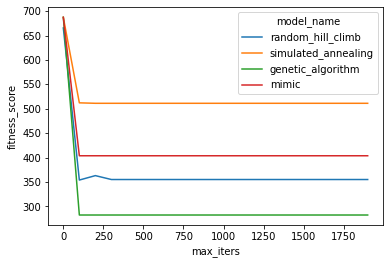

In [669]:
import seaborn as sns
sns.lineplot(data=df, x="max_iters", y="fitness_score", hue="model_name")

<AxesSubplot:xlabel='max_iters', ylabel='duration'>

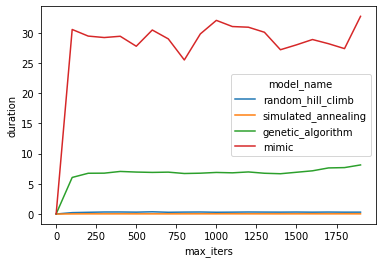

In [670]:
sns.lineplot(data=df, x="max_iters", y="duration", hue="model_name")

**Experimenting with a smaller/ simpler problem**

In [696]:
records = df.sample(5).loc[:,2:3].to_records(index=False)
result = list(records)
print(result)

[(50, 30), (48, 17), (41, 44), (60, 19), (41, 12)]


In [697]:
## copy coordinates
result = [(50, 30), (48, 17), (41, 44), (60, 19), (41, 12)]
# Initialize fitness function object using coords_list
fitness_coords = mlrose_new.TravellingSales(coords = result)
# Define optimization problem object
problem_fit = mlrose_new.TSPOpt(length = 5, fitness_fn = fitness_coords, maximize=False)

In [698]:
res = []
models = [random_hill_climb, simulated_annealing, genetic_algorithm, mimic]
for model in models: 
    for j in range(0, 2000, 100):
        res.append(model(problem_fit, max_iters = j))

<AxesSubplot:xlabel='max_iters', ylabel='fitness_score'>

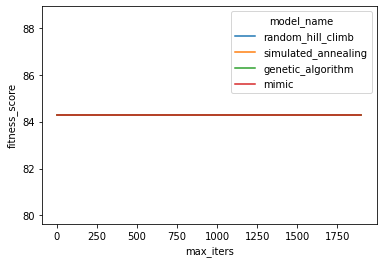

In [700]:
df = pd.DataFrame(res, columns = ['fitness_score', 'duration', 'max_iters', 'model_name'])
sns.lineplot(data=df, x="max_iters", y="fitness_score", hue="model_name")


<AxesSubplot:xlabel='max_iters', ylabel='duration'>

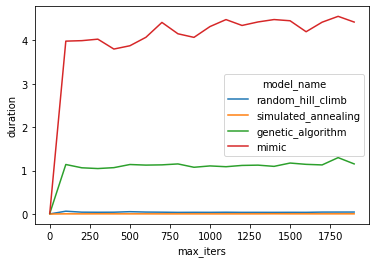

In [701]:
sns.lineplot(data=df, x="max_iters", y="duration", hue="model_name")

## Knap sack problem
Mimic is the best performing algorithm, however, it takes the most amount of wall clock time. 

In [693]:
weights = [10, 5, 2, 8, 15, 9, 3, 15, 20, 6]
values = [1, 2, 3, 4, 5, 6, 7, 10, 25, 10]
max_weight_pct = 0.6
fitness = mlrose_new.Knapsack(weights, values, max_weight_pct)
# Define optimization problem object
problem_fit = mlrose_new.DiscreteOpt(length = 10, fitness_fn = fitness, maximize=True)

In [694]:
problem_fit

In [695]:
mlrose_new.simulated_annealing(problem_fit,max_attempts = 30, max_iters = max_iters,
                                                      init_state = None, random_state = 2)

(array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1]), 31.0, None)

In [642]:
res = []
models = [random_hill_climb, simulated_annealing, genetic_algorithm, mimic]
for model in models: 
    for j in range(0, 2000, 100):
        res.append(model(problem_fit, max_iters = j))

<AxesSubplot:xlabel='max_iters', ylabel='fitness_score'>

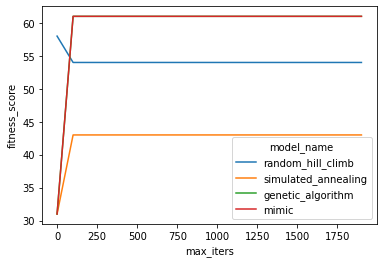

In [643]:
df = pd.DataFrame(res, columns = ['fitness_score', 'duration', 'max_iters', 'model_name'])

sns.lineplot(data=df, x="max_iters", y="fitness_score", hue="model_name")

<AxesSubplot:xlabel='max_iters', ylabel='fitness_score'>

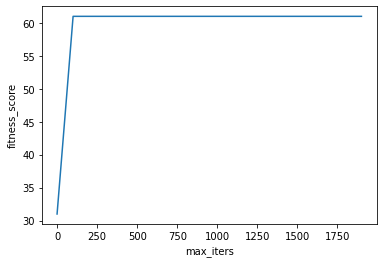

In [649]:
sns.lineplot(data=df[df['model_name'] == 'genetic_algorithm'] , x="max_iters", y="fitness_score")

<AxesSubplot:xlabel='max_iters', ylabel='duration'>

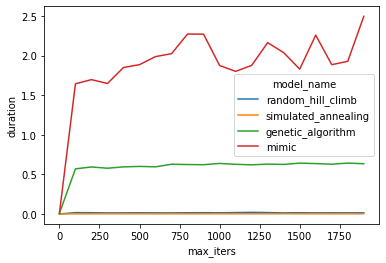

In [650]:
sns.lineplot(data=df, x="max_iters", y="duration", hue="model_name")

In [651]:
res = []
models = [random_hill_climb, simulated_annealing, genetic_algorithm, mimic]
for model in models: 
    for j in range(0, 10, 1):
        res.append(model(problem_fit, max_iters = j))


<AxesSubplot:xlabel='max_iters', ylabel='fitness_score'>

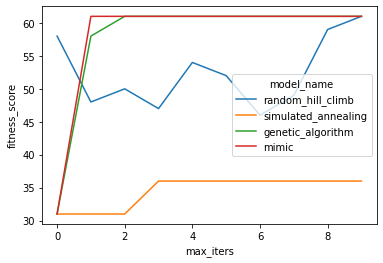

In [652]:
df = pd.DataFrame(res, columns = ['fitness_score', 'duration', 'max_iters', 'model_name'])

sns.lineplot(data=df, x="max_iters", y="fitness_score", hue="model_name")

<AxesSubplot:xlabel='max_iters', ylabel='duration'>

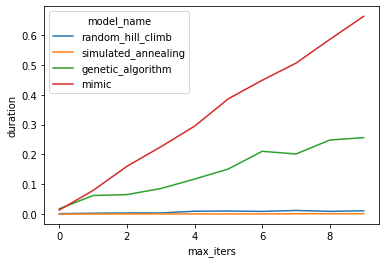

In [654]:
sns.lineplot(data=df, x="max_iters", y="duration", hue="model_name")

In [589]:
res = []
models = [random_hill_climb, simulated_annealing, genetic_algorithm, mimic]
for model in models: 
    for j in range(0, 2000, 100):
        res.append(model(problem_fit, max_iters = j))

<AxesSubplot:xlabel='max_iters', ylabel='fitness_score'>

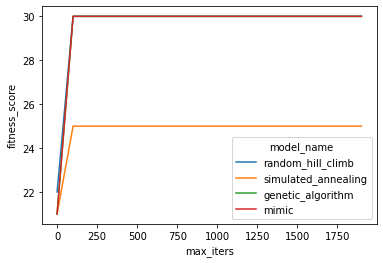

In [590]:
df = pd.DataFrame(res, columns = ['fitness_score', 'duration', 'max_iters', 'model_name'])

sns.lineplot(data=df, x="max_iters", y="fitness_score", hue="model_name")


<AxesSubplot:xlabel='max_iters', ylabel='duration'>

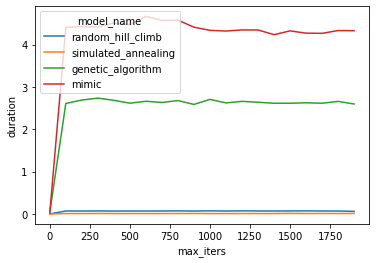

In [591]:
sns.lineplot(data=df, x="max_iters", y="duration", hue="model_name")

In [592]:
## Flipflop

In [593]:
fitness = mlrose_new.FlipFlop()
# Define optimization problem object
problem_fit = mlrose_new.DiscreteOpt(length = 20, fitness_fn = fitness, maximize=True, max_val = 2)

In [594]:
res = []
models = [random_hill_climb, simulated_annealing, genetic_algorithm, mimic]
for model in models:
    for j in range(0, 200, 20):
        res.append(model(problem_fit, max_iters = j))
df = pd.DataFrame(res, columns = ['fitness_score', 'duration', 'max_iters', 'model_name'])

<AxesSubplot:xlabel='max_iters', ylabel='fitness_score'>

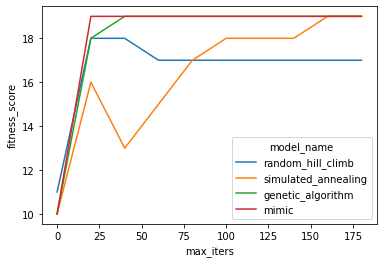

In [595]:
sns.lineplot(data=df, x="max_iters", y="fitness_score", hue="model_name")

<AxesSubplot:xlabel='max_iters', ylabel='duration'>

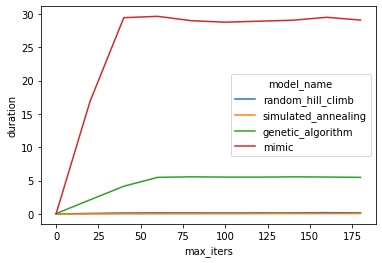

In [596]:
sns.lineplot(data=df, x="max_iters", y="duration", hue="model_name")

### Queens
SA is best performing, even though it doesn't reach the global optima the fastest in number of iterations, it takes significantly shorter time to iterate through. 

In [599]:

fitness = mlrose_new.Queens()
problem_fit = mlrose_new.DiscreteOpt(length = 10, fitness_fn = fitness, maximize=True, max_val = 2)

In [600]:
res = []
models = [random_hill_climb, simulated_annealing, genetic_algorithm, mimic]
for model in models: 
    for j in range(0, 2000, 100):
        res.append(model(problem_fit, max_iters = j))
df = pd.DataFrame(res, columns = ['fitness_score', 'duration', 'max_iters', 'model_name'])

<AxesSubplot:xlabel='max_iters', ylabel='fitness_score'>

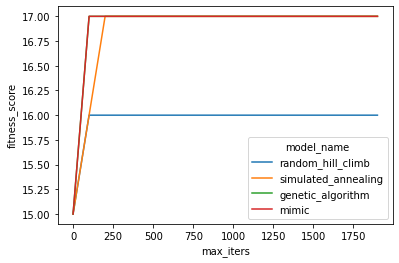

In [601]:
sns.lineplot(data=df, x="max_iters", y="fitness_score", hue="model_name")

<AxesSubplot:xlabel='max_iters', ylabel='duration'>

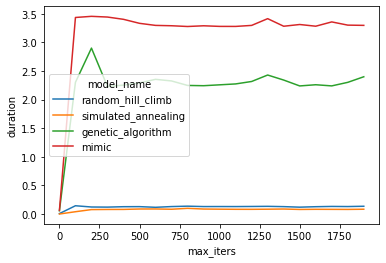

In [602]:
sns.lineplot(data=df, x="max_iters", y="duration", hue="model_name")

<AxesSubplot:xlabel='max_iters', ylabel='fitness_score'>

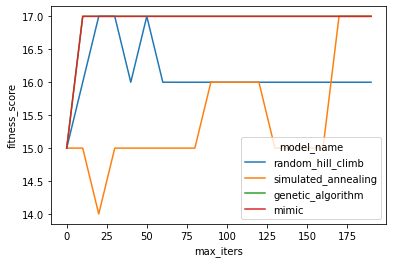

In [603]:
## 200 iternations range
res = []
models = [random_hill_climb, simulated_annealing, genetic_algorithm, mimic]
for model in models: 
    for j in range(0, 200, 10):
        res.append(model(problem_fit, max_iters = j))
df = pd.DataFrame(res, columns = ['fitness_score', 'duration', 'max_iters', 'model_name'])
sns.lineplot(data=df, x="max_iters", y="fitness_score", hue="model_name")

<AxesSubplot:xlabel='max_iters', ylabel='fitness_score'>

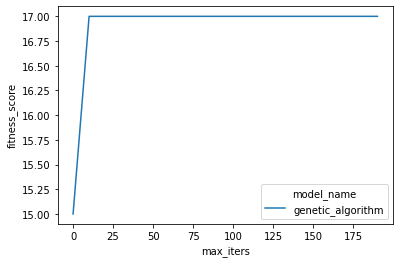

In [605]:
## observing GA since it is covered by another line in the previous graph
res = []
models = [genetic_algorithm]
for model in models: 
    for j in range(0, 200, 10):
        res.append(model(problem_fit, max_iters = j))
df = pd.DataFrame(res, columns = ['fitness_score', 'duration', 'max_iters', 'model_name'])
sns.lineplot(data=df, x="max_iters", y="fitness_score", hue="model_name")

### Flipflop

In [671]:
fitness = mlrose_new.FlipFlop()
problem_fit = mlrose_new.DiscreteOpt(length = 100, fitness_fn = fitness, maximize=True, max_val = 2)

In [672]:
res = []
models = [random_hill_climb, simulated_annealing, genetic_algorithm, mimic]
for model in models: 
    for j in range(0, 2000, 100):
        res.append(model(problem_fit, max_iters = j))
df = pd.DataFrame(res, columns = ['fitness_score', 'duration', 'max_iters', 'model_name'])

KeyboardInterrupt: 

In [ ]:
sns.lineplot(data=df, x="max_iters", y="fitness_score", hue="model_name")

In [ ]:
sns.lineplot(data=df, x="max_iters", y="duration", hue="model_name")

In [609]:
## GA
res = []
models = [genetic_algorithm]
for model in models: 
    for j in range(0, 2000, 100):
        res.append(model(problem_fit, max_iters = j))
df = pd.DataFrame(res, columns = ['fitness_score', 'duration', 'max_iters', 'model_name'])

<AxesSubplot:xlabel='max_iters', ylabel='fitness_score'>

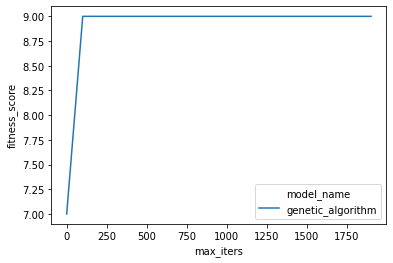

In [610]:
sns.lineplot(data=df, x="max_iters", y="fitness_score", hue="model_name")